# Time Series

In [1]:
%pylab inline

import numpy as np
from numpy.random import randn

import pandas as pd
from pandas import Series, DataFrame

Populating the interactive namespace from numpy and matplotlib


In [2]:
from datetime import datetime
from datetime import timedelta

In [3]:
now = datetime.now()
now

datetime.datetime(2017, 3, 27, 19, 55, 39, 34289)

In [4]:
now.year, now.month, now.day

(2017, 3, 27)

In [5]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
delta

datetime.timedelta(926, 56700)

In [6]:
delta.days, delta.seconds

(926, 56700)

In [7]:
datetime.now() + timedelta(1)

datetime.datetime(2017, 3, 28, 19, 55, 39, 64692)

### Converting between string and datetime

In [8]:
stamp = datetime(2011, 1, 3)
str(stamp)

'2011-01-03 00:00:00'

In [9]:
timeStr = stamp.strftime('%Y-%m-%d')
timeStr

'2011-01-03'

In [10]:
timeVal = datetime.strptime(timeStr, '%Y-%m-%d')
timeVal

datetime.datetime(2011, 1, 3, 0, 0)

In [11]:
from dateutil.parser import parse
parse('2011-01-03'), parse('Jan 31, 1997 10:45 PM')

(datetime.datetime(2011, 1, 3, 0, 0), datetime.datetime(1997, 1, 31, 22, 45))

In [12]:
datestrs = ['7/6/2011', '8/6/2011']
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06', '2011-08-06'], dtype='datetime64[ns]', freq=None)

## Time Series Basics

In [13]:
dates = [
    datetime(2011,1,2),
    datetime(2011,1,5),
    datetime(2011,1,7),
    datetime(2011,1,8),
    datetime(2011,1,10),
    datetime(2011,1,12)
]

ts = Series(np.arange(6), index=dates)
ts

2011-01-02    0
2011-01-05    1
2011-01-07    2
2011-01-08    3
2011-01-10    4
2011-01-12    5
dtype: int64

In [14]:
ts + ts[::2]

2011-01-02    0.0
2011-01-05    NaN
2011-01-07    4.0
2011-01-08    NaN
2011-01-10    8.0
2011-01-12    NaN
dtype: float64

### Indexing, Selection, Subsetting

In [15]:
stamp = ts.index[2]
ts[stamp]

2

In [16]:
ts['1/7/2011'], ts['20110107']

(2, 2)

In [17]:
longer_ts = Series(np.arange(1000),
                   index=pd.date_range('1/1/2000', periods=1000))
longer_ts[:4]

2000-01-01    0
2000-01-02    1
2000-01-03    2
2000-01-04    3
Freq: D, dtype: int64

In [18]:
len(longer_ts['2001']), len(longer_ts['2001-05'])

(365, 31)

In [19]:
ts[datetime(2011,1,7):]

2011-01-07    2
2011-01-08    3
2011-01-10    4
2011-01-12    5
dtype: int64

In [20]:
ts[datetime(2011,1,7):datetime(2011,1,10)]

2011-01-07    2
2011-01-08    3
2011-01-10    4
dtype: int64

In [21]:
ts['20110107':'20110110']

2011-01-07    2
2011-01-08    3
2011-01-10    4
dtype: int64

In [22]:
long_df = DataFrame(
    np.arange(400).reshape((100,4)),
    index = pd.date_range('1/1/2000', periods=100, freq='W-WED'),
    columns = ['A', 'B', 'C', 'D']
)
long_df.ix['2001-05']

,A,B,C,D
2001-05-02,276,277,278,279
2001-05-09,280,281,282,283
2001-05-16,284,285,286,287
2001-05-23,288,289,290,291
2001-05-30,292,293,294,295


### Time Series with Duplicate Indices

In [23]:
dates = pd.DatetimeIndex([
    '1/1/2000', '1/2/2000', '1/2/2000', '1/2/2000', '1/3/2000'
])

dup_ts = Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

In [24]:
dup_ts['20000101']

0

In [25]:
dup_ts['20000102']

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

In [26]:
dup_ts.groupby(level=0).mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int64

In [27]:
dup_ts.groupby(dup_ts.index).mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int64

## Date Ranges, Frequencies, and Shifting
### Generating Date Ranges

In [28]:
pd.date_range('1/1/2000', '1/5/2000')

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05'],
              dtype='datetime64[ns]', freq='D')

In [29]:
pd.date_range('1/1/2000', periods=5)

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05'],
              dtype='datetime64[ns]', freq='D')

In [30]:
pd.date_range('1/1/2000', periods=5, freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31'],
              dtype='datetime64[ns]', freq='BM')

### Frequencies and Date Offsets

In [31]:
from pandas.tseries.offsets import Hour, Minute
freq = Hour(5) + Minute(30)

In [32]:
pd.date_range('1/1/2000', periods=4, freq=freq)

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 05:30:00',
               '2000-01-01 11:00:00', '2000-01-01 16:30:00'],
              dtype='datetime64[ns]', freq='330T')

In [33]:
pd.date_range('1/1/2000', periods=4, freq='5h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 05:30:00',
               '2000-01-01 11:00:00', '2000-01-01 16:30:00'],
              dtype='datetime64[ns]', freq='330T')

In [34]:
dates = pd.date_range('1/1/2000', periods=4, freq='WOM-3FRI')
dates.strftime('%w')

array([u'5', u'5', u'5', u'5'], 
      dtype='<U1')

### Shifting (Leading and Lagging) Data

In [35]:
ts = Series(np.arange(4)+1,
            index=pd.date_range('1/1/2000', periods=4, freq='M'))
ts

2000-01-31    1
2000-02-29    2
2000-03-31    3
2000-04-30    4
Freq: M, dtype: int64

In [36]:
ts.shift(1)

2000-01-31    NaN
2000-02-29    1.0
2000-03-31    2.0
2000-04-30    3.0
Freq: M, dtype: float64

In [37]:
ts.shift(3, freq='D')

2000-02-03    1
2000-03-03    2
2000-04-03    3
2000-05-03    4
dtype: int64

In [38]:
ts.shift(1, freq='3D')

2000-02-03    1
2000-03-03    2
2000-04-03    3
2000-05-03    4
dtype: int64

In [39]:
ts.shift(1, freq='90T')

2000-01-31 01:30:00    1
2000-02-29 01:30:00    2
2000-03-31 01:30:00    3
2000-04-30 01:30:00    4
Freq: M, dtype: int64

### Shifting dates with offsets

In [40]:
from pandas.tseries.offsets import Day, MonthEnd

In [41]:
now = datetime.now()
now

datetime.datetime(2017, 3, 27, 19, 55, 39, 756689)

In [42]:
now + 3*Day(), now + Day(3)

(Timestamp('2017-03-30 19:55:39.756689'),
 Timestamp('2017-03-30 19:55:39.756689'))

In [43]:
now + MonthEnd(), now + MonthEnd(2)

(Timestamp('2017-03-31 19:55:39.756689'),
 Timestamp('2017-04-30 19:55:39.756689'))

In [44]:
offset = MonthEnd()
offset.rollforward(now), offset.rollback(now)

(Timestamp('2017-03-31 19:55:39.756689'),
 Timestamp('2017-02-28 19:55:39.756689'))

In [45]:
ts = Series(np.arange(100), index=pd.date_range('1/1/2000', periods=100))
ts.groupby(offset.rollforward).count()

2000-01-31    31
2000-02-29    29
2000-03-31    31
2000-04-30     9
dtype: int64

In [46]:
ts.resample('M').count()

2000-01-31    31
2000-02-29    29
2000-03-31    31
2000-04-30     9
Freq: M, dtype: int64

## Time Zone Handling

In [47]:
import pytz

In [48]:
pytz.timezone('Asia/Shanghai')

<DstTzInfo 'Asia/Shanghai' LMT+8:06:00 STD>

### Localization and Conversion

In [49]:
ts = Series(
    np.arange(6),
    index = pd.date_range('1/1/2000', periods=6)
)
ts

2000-01-01    0
2000-01-02    1
2000-01-03    2
2000-01-04    3
2000-01-05    4
2000-01-06    5
Freq: D, dtype: int64

In [50]:
print ts.index.tz

None


In [51]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2000-01-01 00:00:00+00:00    0
2000-01-02 00:00:00+00:00    1
2000-01-03 00:00:00+00:00    2
2000-01-04 00:00:00+00:00    3
2000-01-05 00:00:00+00:00    4
2000-01-06 00:00:00+00:00    5
Freq: D, dtype: int64

In [52]:
print ts_utc.index.tz

UTC


In [53]:
ts_utc.tz_convert('US/Eastern')

1999-12-31 19:00:00-05:00    0
2000-01-01 19:00:00-05:00    1
2000-01-02 19:00:00-05:00    2
2000-01-03 19:00:00-05:00    3
2000-01-04 19:00:00-05:00    4
2000-01-05 19:00:00-05:00    5
Freq: D, dtype: int64

### Operations with Time Zone−aware Timestamp Objects

In [54]:
pd.Timestamp('1/1/2000 4:00').tz_localize('UTC').tz_convert('US/Eastern')

Timestamp('1999-12-31 23:00:00-0500', tz='US/Eastern')

In [55]:
pd.Timestamp('1/1/2000 4:00', tz='UTC').tz_convert('US/Eastern')

Timestamp('1999-12-31 23:00:00-0500', tz='US/Eastern')

In [56]:
stamp = pd.Timestamp('1/1/2000 4:00', tz='UTC')
stamp.tz_convert('US/Mountain').value, stamp.tz_convert('US/Eastern').value

(946699200000000000, 946699200000000000)

### Operations between Different Time Zones

In [57]:
rng = pd.date_range('1/1/2000', periods=10, freq='B')
ts = Series(np.arange(len(rng)), index=rng).tz_localize('UTC')

In [58]:
ts[:].tz_convert('Europe/London') + ts[:].tz_convert('Europe/Moscow')

2000-01-03 00:00:00+00:00     0
2000-01-04 00:00:00+00:00     2
2000-01-05 00:00:00+00:00     4
2000-01-06 00:00:00+00:00     6
2000-01-07 00:00:00+00:00     8
2000-01-10 00:00:00+00:00    10
2000-01-11 00:00:00+00:00    12
2000-01-12 00:00:00+00:00    14
2000-01-13 00:00:00+00:00    16
2000-01-14 00:00:00+00:00    18
Freq: B, dtype: int64

## Periods and Period Arithmetic

In [59]:
p = pd.Period(2007, freq='A-DEC')
p

Period('2007', 'A-DEC')

In [60]:
rng = pd.period_range('2007', periods=2, freq='A-DEC')
rng

PeriodIndex(['2007', '2008'], dtype='period[A-DEC]', freq='A-DEC')

### Period Frequency Conversion

In [61]:
p.asfreq('M', how='start'), p.asfreq('M', how='end')

(Period('2007-01', 'M'), Period('2007-12', 'M'))

In [62]:
rng.asfreq('M', how='start'), rng.asfreq('M', how='end')

(PeriodIndex(['2007-01', '2008-01'], dtype='period[M]', freq='M'),
 PeriodIndex(['2007-12', '2008-12'], dtype='period[M]', freq='M'))

### Quarterly Period Frequencies

In [63]:
p = pd.Period('2012Q4', freq='Q-JAN')
p

Period('2012Q4', 'Q-JAN')

In [64]:
p.asfreq('D', 'start'), p.asfreq('D', 'end')

(Period('2011-11-01', 'D'), Period('2012-01-31', 'D'))

In [65]:
((p.asfreq('B','e') - 1).asfreq('T', 's') + 16*60).to_timestamp()

Timestamp('2012-01-30 16:00:00')

### Converting Timestamps to Periods (and Back)

In [66]:
rng = pd.date_range('1/1/2000', periods=6, freq='D')

In [67]:
rng.to_period('M')

PeriodIndex(['2000-01', '2000-01', '2000-01', '2000-01', '2000-01', '2000-01'], dtype='period[M]', freq='M')

In [68]:
rng.to_period('M').to_timestamp(how='end')

DatetimeIndex(['2000-01-31', '2000-01-31', '2000-01-31', '2000-01-31',
               '2000-01-31', '2000-01-31'],
              dtype='datetime64[ns]', freq=None)

### Creating a PeriodIndex from Arrays

In [69]:
data = pd.read_csv('ch08/macrodata.csv')
data[:5]

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [70]:
data.index = pd.PeriodIndex(year=data.year, quarter=data.quarter, freq='Q-DEC')
data[:5]

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959Q1,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959Q2,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959Q3,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959Q4,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960Q1,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


## Resampling and Frequency Conversion

In [73]:
rng = pd.date_range('1/1/2000', periods=100, freq='D')
ts = Series(randn(len(rng)), index=rng)
ts.resample('M').mean()

2000-01-31   -0.023374
2000-02-29    0.294911
2000-03-31   -0.435654
2000-04-30   -0.125778
Freq: M, dtype: float64

### Downsampling

In [83]:
rng = pd.date_range('1/1/2000', periods=12, freq='T')
ts = Series(np.arange(12), index=rng)
ts.resample('5min').sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int64

In [84]:
ts.resample('5min', closed='left').sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int64

In [85]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int64

### Open-High-Low-Close (OHLC) resampling

In [86]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


### Resampling with GroupBy

In [87]:
rng = pd.date_range('1/1/2000', periods=100, freq='D')
ts = Series(np.arange(100), index=rng)
ts.groupby(lambda x: x.month).mean()

1    15
2    45
3    75
4    95
dtype: int64

### Upsampling and Interpolation

In [89]:
frame = DataFrame(np.random.randn(2,4),
                 index=pd.date_range('1/1/2000', periods=2, freq='W-WED'),
                 columns=['A','B','C','D'])
frame

,A,B,C,D
2000-01-05,-0.321288,-0.945646,0.579135,0.207469
2000-01-12,-0.850250,0.066583,-2.509515,-0.732157


In [92]:
frame.resample('D')

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, base=0]

In [93]:
frame.resample('D').ffill()

,A,B,C,D
2000-01-05,-0.321288,-0.945646,0.579135,0.207469
2000-01-06,-0.321288,-0.945646,0.579135,0.207469
2000-01-07,-0.321288,-0.945646,0.579135,0.207469
2000-01-08,-0.321288,-0.945646,0.579135,0.207469
2000-01-09,-0.321288,-0.945646,0.579135,0.207469
2000-01-10,-0.321288,-0.945646,0.579135,0.207469
2000-01-11,-0.321288,-0.945646,0.579135,0.207469
2000-01-12,-0.850250,0.066583,-2.509515,-0.732157


### Resampling with Periods

In [100]:
frame = DataFrame(np.random.randn(24,4),
                 index=pd.period_range('1-2000', periods=24, freq='M'),
                 columns=['A','B','C','D'])

In [102]:
frame.resample('Q-DEC').mean()

,A,B,C,D
2000Q1,0.265467,0.068163,-0.180423,0.406537
2000Q2,-0.085164,0.277047,-0.683551,-0.972264
2000Q3,0.611890,1.168560,0.307095,0.475422
2000Q4,0.268094,0.388247,0.790433,0.036801
2001Q1,-0.304289,-0.580261,1.348504,-0.504203
2001Q2,0.179672,0.476107,-0.135349,-0.615923
2001Q3,-0.933505,1.033627,-0.368724,0.517476
2001Q4,-0.073389,0.211087,0.045213,-0.064832


In [103]:
annual_frame = frame.resample('A-DEC').mean()
annual_frame

,A,B,C,D
2000,0.265072,0.475504,0.058388,-0.013376
2001,-0.282878,0.285140,0.222411,-0.166871


In [104]:
annual_frame.resample('Q-DEC').ffill()

,A,B,C,D
2000Q1,0.265072,0.475504,0.058388,-0.013376
2000Q2,0.265072,0.475504,0.058388,-0.013376
2000Q3,0.265072,0.475504,0.058388,-0.013376
2000Q4,0.265072,0.475504,0.058388,-0.013376
2001Q1,-0.282878,0.285140,0.222411,-0.166871
2001Q2,-0.282878,0.285140,0.222411,-0.166871
2001Q3,-0.282878,0.285140,0.222411,-0.166871
2001Q4,-0.282878,0.285140,0.222411,-0.166871


## Time Series Plotting

In [110]:
close_px_all = pd.read_csv('ch09/stock_px.csv',
                           parse_dates=True,
                           index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]

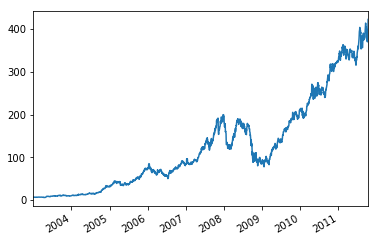

In [111]:
close_px['AAPL'].plot()

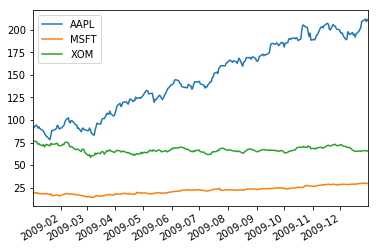

In [112]:
close_px['2009'].plot()

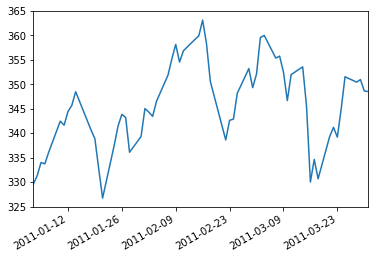

In [113]:
close_px['AAPL'].ix['01-2011':'03-2011'].plot()

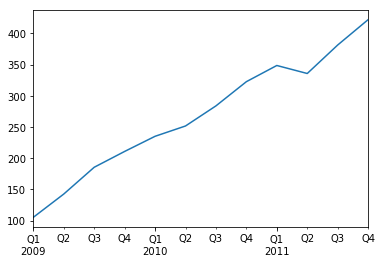

In [118]:
close_px['AAPL'].resample('Q-DEC').ffill().ix['2009':].plot()

## Moving Window Functions

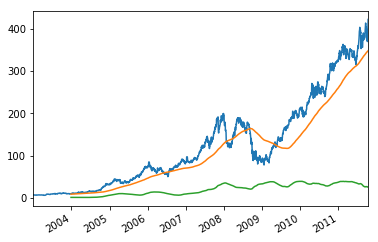

In [123]:
close_px.AAPL.plot()
close_px.AAPL.rolling(250).mean().plot()
close_px.AAPL.rolling(250).std().plot()

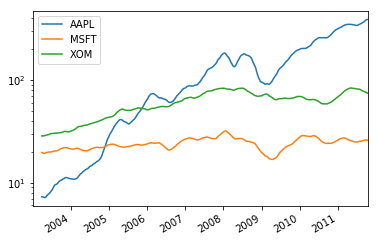

In [125]:
close_px.rolling(60).mean().plot(logy=True)

### Exponentially-weighted functions

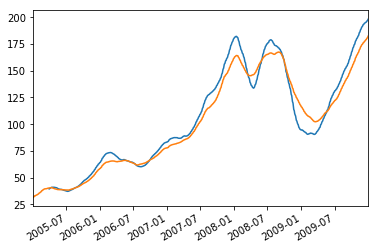

In [157]:
aapl_px = close_px.AAPL['2005':'2009']
aapl_px.rolling(60).mean().plot()
aapl_px.ewm(60).mean().plot()

### Binary Moving Window Functions

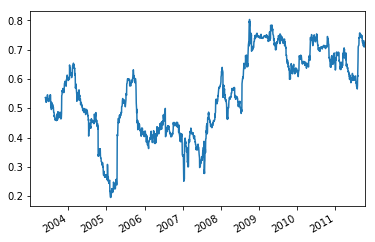

In [163]:
spx_px = close_px_all['SPX']
spx_rets = spx_px / spx_px.shift(1) - 1
returns = close_px.pct_change()
corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()